In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.compose import ColumnTransformer 

In [ ]:
# Extract Column Names
import csv
with open("Modified.csv", 'r') as file:
    csvreader = csv.reader(file)
    column_names = next(csvreader)
    
print(column_names)

['gen_cat', 'Hypertension_cat', 'IHD_cat', 'insulin_treatment_cat', 'fam_his_diab_cat', 'bp_sys', 'Physical_AS_cat', 'ann_family_in', 'HbA1c_grade_cat', 'agegrp_cat', 'BMIcat', 'DurYrs', 'FBS_Grp_cat', 'DR']


# Preprocessing

In [ ]:
dataset = pd.read_csv("Modified.csv")
X = dataset.iloc[:,:-1].values

In [ ]:
# Auxiliary Printing Functions

def print_patient(i, transposed_array):
  for j in range(transposed_array.shape[0]):
    print("Attribute ",j, " is: ",transposed_array[j][i])

def print_Attribute(cluster_array):
  i = 0
  cluster_0 = []
  cluster_1 = []
  for index in cluster_array:
    if index==0:
      cluster_0.append(i)
    if index==1:
      cluster_1.append(i)
    i=i+1
    
  print_cluster(cluster_0, 0)
  print()
  print_cluster(cluster_1, 1)


def print_cluster(indices, num):
  print("Cluster ",num," Attributes are:")
  for index in indices:
    print(" ",column_names[index])

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

X_prime = np.transpose(X)

In [ ]:
print("Shape of X is ", X.shape)
print("Shape of X_prime is ", X_prime.shape)

Shape of X is  (1555, 13)
Shape of X_prime is  (13, 1555)


In [ ]:
print_patient(2, X_prime)

Attribute  0  is:  1.0481009109661872
Attribute  1  is:  0.7077889875981761
Attribute  2  is:  0.35495866706171625
Attribute  3  is:  -0.32648344853873473
Attribute  4  is:  -0.8374442729426622
Attribute  5  is:  0.7396367268254443
Attribute  6  is:  -0.9535270502862265
Attribute  7  is:  -0.42125667810578554
Attribute  8  is:  -1.6473006386169227
Attribute  9  is:  1.8472767685597935
Attribute  10  is:  -0.42913740030261033
Attribute  11  is:  -0.49115723537003214
Attribute  12  is:  -0.9752263836528662


# Clustering

### K-Means

In [ ]:
from sklearn.cluster import KMeans, FeatureAgglomeration, AgglomerativeClustering, MeanShift

In [ ]:
kmeans = KMeans(n_clusters = 2, init="k-means++",random_state=0)

y_kmeans = kmeans.fit_predict(X_prime)

In [ ]:
print(y_kmeans)

[0 1 1 1 1 0 1 1 0 0 1 0 0]


In [ ]:
print_Attribute(y_kmeans)

Cluster  0  Attributes are:
  gen_cat
  bp_sys
  HbA1c_grade_cat
  agegrp_cat
  DurYrs
  FBS_Grp_cat

Cluster  1  Attributes are:
  Hypertension_cat
  IHD_cat
  insulin_treatment_cat
  fam_his_diab_cat
  Physical_AS_cat
  ann_family_in
  BMIcat


### Agglomerative Clustering

In [ ]:
clustering = AgglomerativeClustering().fit(X_prime)
labels = clustering.labels_
print(labels)

[0 1 1 1 0 0 1 1 0 0 0 0 0]


In [ ]:
print_Attribute(labels)

Cluster  0  Attributes are:
  gen_cat
  fam_his_diab_cat
  bp_sys
  HbA1c_grade_cat
  agegrp_cat
  BMIcat
  DurYrs
  FBS_Grp_cat

Cluster  1  Attributes are:
  Hypertension_cat
  IHD_cat
  insulin_treatment_cat
  Physical_AS_cat
  ann_family_in


# Visualization with TSNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
X_embedding = TSNE(n_components=2, perplexity = 2, learning_rate='auto', init='random').fit_transform(X_prime)
print(X_embedding.shape)

(13, 2)


In [ ]:
def scatter(X): 
    # X is the transposed embedding
    fig, ax = plt.subplots(figsize=(10, 7.5))
    x = X[:, 0]
    y = X[:, 1]
    for i in range (X.shape[0]):
      plt.text(X[i][0], X[i][1], column_names[i], fontsize = 15)
    plt.scatter(x, y)
    
    plt.show()

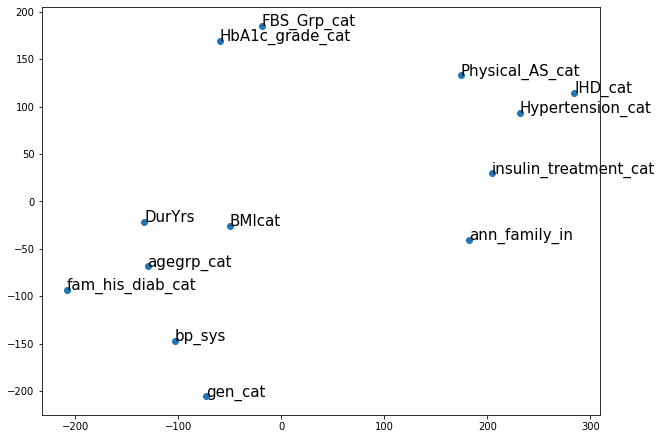

In [ ]:
scatter(X_embedding)